In [1]:
from pathlib import Path
# import json

import pandas as pd
import anndata as ad
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Load abc atlas data

In [2]:
abc_root = Path("/data/abc_atlas/")
brain_id = 'C57BL6J-638850'
version = '20230830'

In [3]:
# load expression matrix for log2 counts
adata_log2 = ad.read_h5ad(abc_root/f"expression_matrices/MERFISH-{brain_id}/{version}/{brain_id}-log2.h5ad", backed='r')

In [4]:
# load in the cell metadata
gene_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}/{version}/gene.csv', 
                         dtype={'cell_label':str},
                         index_col=0)

In [5]:
# load in the cell metadata
cell_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}/{version}/cell_metadata.csv', 
                         dtype={'cell_label':str},
                         index_col=0)

In [6]:
# load in the _cluster_annotation metadata csv
cluster_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}/{version}/views/cell_metadata_with_cluster_annotation.csv', 
                            dtype={'cell_label':str},
                            index_col=0)

In [7]:
# load in the _parcellation_annotation metadata csv
ccf_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}-CCF/{version}/views/cell_metadata_with_parcellation_annotation.csv', 
                        dtype={'cell_label':str},
                        index_col=0)

# # flip y coords so the sections don't display upside down
# flip_y=True
# if flip_y:
#     ccf_md_df[['y_section', 'y_reconstructed']] *= -1

# What's in each metadata file?

## expression matrices (log2 & raw) h5ad

- 4,334,174 cells (~4.3 million)

In [8]:
print(f'{adata_log2.n_obs=}')
adata_log2

adata_log2.n_obs=4334174


AnnData object with n_obs × n_vars = 4334174 × 550 backed at '/data/abc_atlas/expression_matrices/MERFISH-C57BL6J-638850/20230830/C57BL6J-638850-log2.h5ad'
    obs: 'brain_section_label'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'accessed_on', 'src'

## gene.csv metadata

In [9]:
print(f'{len(gene_md_df)=}')
gene_md_df

len(gene_md_df)=550


,gene_symbol,transcript_identifier,name,mapped_ncbi_identifier
gene_identifier,,,,
ENSMUSG00000026778,Prkcq,ENSMUST00000028118,"protein kinase C, theta",NCBIGene:18761
ENSMUSG00000026837,Col5a1,ENSMUST00000028280,"collagen, type V, alpha 1",NCBIGene:12831
ENSMUSG00000001985,Grik3,ENSMUST00000030676,"glutamate receptor, ionotropic, kainate 3",NCBIGene:14807
ENSMUSG00000039323,Igfbp2,ENSMUST00000047328,insulin-like growth factor binding protein 2,NCBIGene:16008
ENSMUSG00000048387,Osr1,ENSMUST00000057021,odd-skipped related transcription factor 1,NCBIGene:23967
...,...,...,...,...
Blank-33,Blank-33,Blank-33,NaN,NaN
Blank-34,Blank-34,Blank-34,NaN,NaN
Blank-45,Blank-45,Blank-45,NaN,NaN


## cell_metadata.csv

In [14]:
print(f'{len(cell_md_df)=}')
cell_md_df.head(5)

len(cell_md_df)=3938808


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z
cell_label,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4


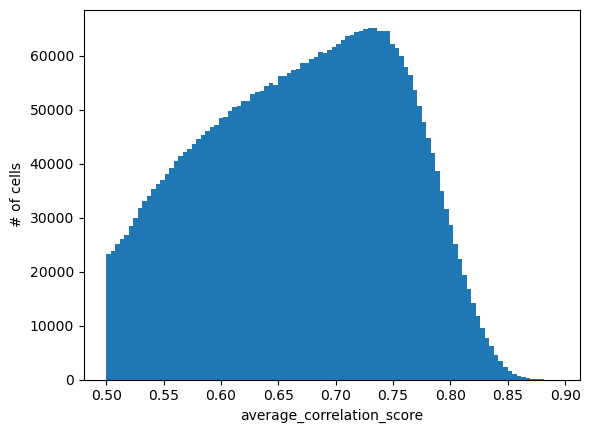

In [19]:
# counts, bins = np.histogram(cell_md_df['average_correlation_score'].values)
fig = plt.figure()
ax = plt.gca()
ax.hist(cell_md_df['average_correlation_score'].values, bins=100)
ax.set_xlabel('average_correlation_score')
ax.set_ylabel('# of cells')
plt.show()

In [12]:
print(f'{len(ccf_md_df)=}')
ccf_md_df

len(ccf_md_df)=3739961


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,brain,grey,HPF,DG,DG-po,#FFFFFF,#BFDAE3,#7ED04B,#7ED04B,#7ED04B
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,brain,grey,P,TRN,TRN,#FFFFFF,#BFDAE3,#FF9B88,#FFBA86,#FFBA86
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,brain,grey,P,P-unassigned,P-unassigned,#FFFFFF,#BFDAE3,#FF9B88,#FF9B88,#FF9B88
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,brain,fiber tracts,cbf,arb,arb,#FFFFFF,#CCCCCC,#CCCCCC,#CCCCCC,#CCCCCC
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,brain,grey,P,P-unassigned,P-unassigned,#FFFFFF,#BFDAE3,#FF9B88,#FF9B88,#FF9B88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,0.574988,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.560003,4.669243,8.8,...,brain,grey,Isocortex,SSp-n,SSp-n2/3,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064
1017165415100930567,C57BL6J-638850.57,5254,0.620546,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.032556,3.695696,11.0,...,brain,grey,Isocortex,ACAd,ACAd5,#FFFFFF,#BFDAE3,#70FF71,#40A666,#40A666
1017155956102610748,C57BL6J-638850.49,5254,0.548053,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.549142,4.231188,9.2,...,brain,grey,Isocortex,SSp-m,SSp-m6a,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064


# Get things looking more like our other adata objects

In [13]:
# older data asset subsetted to thalamus/ZI outline
_REFERENCE_TH_ANNDATA_PATH = "//allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/meghanturner/thalamus_data/atlas_brain_638850_AIT17_custom_CCF_annotated_TH_ZI_only.h5ad"
abc_root = Path("//allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/meghanturner/abc_atlas/abc_atlas_data/")
brain_id = 'C57BL6J-638850'
version="20230830"

In [ ]:
# get both the raw and log2 counts 
#  - log2 for plotting gene expression, etc.
#  - raw required for mapping with cell-type-mapper
adata_raw = ad.read_h5ad(abc_root/f"expression_matrices/MERFISH-{brain_id}/{version}/{brain_id}-raw.h5ad", backed='r')
adata_log2 = ad.read_h5ad(abc_root/f"expression_matrices/MERFISH-{brain_id}/{version}/{brain_id}-log2.h5ad", backed='r')

In [ ]:
print(len(adata_raw), len(adata_log2))

In [ ]:
ccf_md_df = pd.read_csv(abc_root/f"metadata/MERFISH-{brain_id}-CCF/{version}/views/cell_metadata_with_parcellation_annotation.csv", 
                        dtype={'cell_label':str}, 
                        index_col=0)

In [ ]:
# flip y coords so the sections don't display upside down
flip_y=True
if flip_y:
    ccf_md_df[['y_section', 'y_reconstructed']] *= -1

In [ ]:
# subset to just TH+ZI using our existing TH+ZI-only h5ad
adata_ref = ad.read_h5ad(_REFERENCE_TH_ANNDATA_PATH, backed='r')

In [ ]:
# subset to only the cells that passed QC through to parcellation annotation
# (it's important to do this BEFORE subsetting with the reference anndata object
#  so that the QC-failed cells don't hang around as NaN rows)
adata_raw = adata_raw[adata_raw.obs_names.intersection(ccf_md_df.index)].to_memory()
# we'll store the log2 counts in X
adata_new = adata_log2[adata_log2.obs_names.intersection(ccf_md_df.index)].to_memory()

In [ ]:
print(len(adata_raw), len(adata_new))

In [ ]:
# # set X to log2 counts
# adata_new = adata_log2.to_memory()

In [ ]:
# store both the raw and log2 counts in layers
adata_new.layers['log2p'] = adata_new.X
adata_new.layers['raw'] = adata_raw.X

In [ ]:
adata_new.obs = ccf_md_df

In [ ]:
adata_new

In [ ]:
# subset to cells that were annotated as TH or ZI either: 
# (a) manually by Brian OR (b) by the ABC atlas ccf parcellation metadata
ccf_th_zi_mask = (ccf_md_df['parcellation_division']=='TH') | (ccf_md_df['parcellation_structure']=='ZI')
manual_th_zi_mask = adata_new.obs_names.isin(adata_ref.obs_names)
th_zi_combo_mask = (ccf_th_zi_mask | manual_th_zi_mask)

adata_new = adata_new[th_zi_combo_mask].copy()

# label cells that were manually annotated as in TH or ZI
adata_new.obs['is_in_TH_or_ZI_manual_polygon'] = adata_new.obs_names.isin(adata_ref.obs_names)

In [ ]:
# tuck into obsm: other spatial coordinates, colors
adata_new.obsm['spatial_ccf'] = adata_new.obs[['x_ccf', 'y_ccf', 'z_ccf']]
adata_new.obsm['spatial_reconstructed'] = adata_new.obs[['x_reconstructed', 
                                                         'y_reconstructed', 
                                                         'z_reconstructed']]
adata_new.obsm['cluster_annotation_colors'] = adata_new.obs[['neurotransmitter_color', 
                                                             'class_color', 
                                                             'subclass_color', 
                                                             'supertype_color', 
                                                             'cluster_color']]
adata_new.obsm['parcellation_annotation_colors'] = adata_new.obs[['parcellation_division_color', 
                                                                  'parcellation_structure_color', 
                                                                  'parcellation_substructure_color']]

In [ ]:
adata_new.obs.columns

In [ ]:
# drop any obs column that we've tucked away in obsm
adata_new.obs.drop(columns=['neurotransmitter_color','class_color', 
                           'subclass_color','supertype_color','cluster_color',
                           'x_reconstructed','y_reconstructed','z_reconstructed',
                           'x_ccf','y_ccf','z_ccf',
                           'parcellation_organ_color','parcellation_category_color',
                           'parcellation_division_color','parcellation_structure_color',
                           'parcellation_substructure_color'], 
                   inplace=True)

# drop redundant or less useful metadata
adata_new.obs.drop(columns=['feature_matrix_label', 'donor_label', 'donor_genotype',
                           'parcellation_index', 'parcellation_organ', 
                           'parcellation_category'],
                   inplace=True)

In [ ]:
adata_new

In [ ]:
adata_new.uns = adata_ref.uns

In [ ]:
sorted(adata_ref.obs['target_atlas_plate'].unique())

In [ ]:
adata_new.obs.head(3)

In [ ]:
adata_new.uns['thalamus_polygons'].keys()

In [ ]:
section_labels_mapping_df = pd.read_csv('section_labels_mapping_mouse638850.csv', dtype=object)
section_labels_mapping_df.head(5)#['internal_section_ids'].values

In [ ]:
# update the thalamus_polygon keys to match the abc atlas section_labels
th_polygons_with_abc_section_labels = {
    sec['abc_atlas_section_labels']: adata_new.uns['thalamus_polygons'].get(sec['internal_section_ids'], None) 
    for _, sec in section_labels_mapping_df.iterrows()
    if sec['internal_section_ids'] in adata_new.uns['thalamus_polygons']
}

adata_new.uns['thalamus_polygons'] = th_polygons_with_abc_section_labels

# Does our TH+ZI subset look like we expect?

In [ ]:
from shapely.geometry import Polygon, MultiLineString, box, Point, MultiPolygon
from shapely.ops import unary_union, polygonize
import shapely.plotting as splot
import shapely
from  geojson.geometry import GeometryCollection
import geojson

## Plot section coordinates vs manual annotation polygon coordinates

In [ ]:
# Add the MD polygons on top
# select the right polygon(s) for this section
# poly_index = np.where( (np.array([int(x) for x in MD_shapes_z])==z_plane) & 
#                        (MD_polys_brain_id==3) )[0]

poly_section_keys = sorted(list(adata_new.uns['thalamus_polygons'].keys()))

curr_sec_id = poly_section_keys[0]
curr_sec = adata_new[adata_new.obs['brain_section_label']==curr_sec_id]

gc = geojson.loads(adata_new.uns['thalamus_polygons'][curr_sec_id])

TH_polys = [shapely.geometry.Polygon(poly['coordinates']) for poly in gc['geometries']]


plt.scatter(curr_sec.obs['x_section'],-curr_sec.obs['y_section'], s=0.1,c='grey')
plt.axis('equal')
plt.show()

for poly in TH_polys:
    plt.plot(np.array(poly.exterior.coords)[:,1], 
             -np.array(poly.exterior.coords)[:,0], 'k')
    
plt.axis('equal')
plt.show()

## Plot Brian's manual annotation vs ABC atlas anatomical neighborhoods

In [ ]:
import numpy as np

n_col = 3
n_row = int(len(poly_section_keys) / n_col)

fig, axes = plt.subplots(n_row, n_col, figsize=(16,12))
axes=axes.ravel()

for i, sec_id in enumerate(poly_section_keys):
    ax = axes[i]
    curr_sec = adata_new[adata_new.obs['brain_section_label']==sec_id]
    sc = ax.scatter(curr_sec.obs['x_section'],-curr_sec.obs['y_section'],
                s=0.1,c=curr_sec.obs['is_in_TH_or_ZI_manual_polygon'],cmap='bwr')
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    if i==0:
        ax.legend(handles=sc.legend_elements()[0],
                   labels=['not in manual polygon', 'in manual TH+ZI polygon'],
                   loc='upper left')

## Plot taxonomy & anatomical levels within BL+ABC-defined TH+ZI

In [ ]:
# adata_new.obsm['parcellation_annotation_colors']['parcellation_structure_color'].unique()
adata_new.obsm['cluster_annotation_colors']['subclass_color'].unique()

In [ ]:
obs_temp_df = adata_new.obs.copy()

In [ ]:
obs_temp_df.columns#['parcellation_division'].unique()

### CCF Division

In [ ]:
# get unique parcellation_structures
ccf_level = 'parcellation_division'
ccf_level_color = 'division_colors'
ccf_structures = obs_temp_df[ccf_level].unique()

cmap = plt.get_cmap('tab20')

# Create a colormap with as many colors as there are categories
structure_colors = cmap(np.linspace(0, 1, len(ccf_structures)))

# map categories to colors
structure_color_mapping = dict(zip(ccf_structures, structure_colors))
obs_temp_df[ccf_level_color] = [structure_color_mapping.get(cat) for cat in obs_temp_df[ccf_level]]

# manually generate legend entries
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], 
                          lw=0, marker='o', markersize=10,
                          markerfacecolor=structure_color_mapping[structure],
                          color=structure_color_mapping[structure], 
                          label=structure) 
                   for structure in structure_color_mapping]

# Plot
n_col = 3
n_row = int(len(poly_section_keys) / n_col)

fig, axes = plt.subplots(n_row, n_col, figsize=(16,12))
axes=axes.ravel()

for i, sec_id in enumerate(poly_section_keys):
    ax = axes[i]
    curr_sec = obs_temp_df[obs_temp_df['brain_section_label']==sec_id]
    sc = ax.scatter(curr_sec['x_section'],-curr_sec['y_section'],
                    s=0.1,c=curr_sec[ccf_level_color])
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    if i==3:
        ax.legend(legend_elements, ccf_structures,
                  loc='center right', bbox_to_anchor=(-0.1,0.5))

In [ ]:
~obs_temp_df['neurotransmitter'].isna()

### Taxonomy - class, subclass

In [ ]:
# get unique parcellation_structures
ccf_level = 'class'
ccf_level_color = 'class_color'

# ccf_structures = obs_temp_df[(~obs_temp_df['neurotransmitter'].isna())][ccf_level].unique()
ccf_structures = obs_temp_df[ccf_level].unique()

# cmap = plt.get_cmap('tab20')

# structure_colors = adata_new[(~obs_temp_df['neurotransmitter'].isna())].obsm['cluster_annotation_colors'][ccf_level_color].unique()
structure_colors = adata_new.obsm['cluster_annotation_colors'][ccf_level_color].unique()

# map categories to colors
structure_color_mapping = dict(zip(ccf_structures, structure_colors))
obs_temp_df[ccf_level_color] = adata_new.obsm['cluster_annotation_colors'][ccf_level_color].values

# manually generate legend entries
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], 
                          lw=0, marker='o', markersize=10,
                          markerfacecolor=structure_color_mapping[structure],
                          color=structure_color_mapping[structure], 
                          label=structure) 
                   for structure in structure_color_mapping]

# Plot
n_col = 3
n_row = int(len(poly_section_keys) / n_col)

fig, axes = plt.subplots(n_row, n_col, figsize=(16,12))
axes=axes.ravel()

for i, sec_id in enumerate(poly_section_keys):
    ax = axes[i]
    curr_sec = obs_temp_df[(obs_temp_df['brain_section_label']==sec_id)
                           & (~obs_temp_df['neurotransmitter'].isna())]
                           # & (obs_temp_df['parcellation_division']=='lfbs')]
    sc = ax.scatter(curr_sec['x_section'],-curr_sec['y_section'],
                    s=0.1,c=curr_sec[ccf_level_color])
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    if i==3:
        ax.legend(legend_elements, ccf_structures,
                  loc='center right', bbox_to_anchor=(-0.1,0.5))

## Plot whole brain sections by anatomical parcellation

In [ ]:
import matplotlib.pyplot as plt
def plot_section( xx=None, yy=None, cc=None, val=None, pcmap=None, 
                 overlay=None, extent=None, bcmap=plt.cm.Greys_r, alpha=1.0,
                 fig_width = 6, fig_height = 6 ) :
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    if xx is not None and yy is not None and pcmap is not None :
        plt.scatter(xx,yy,s=0.5,c=val,marker='.',cmap=pcmap)
    elif xx is not None and yy is not None and cc is not None :
        plt.scatter(xx,yy,s=0.5,color=cc,marker='.',zorder=1)   
        
    if overlay is not None and extent is not None and bcmap is not None :
        plt.imshow(overlay, cmap=bcmap, extent=extent,alpha=alpha,zorder=2)
        
    ax.set_ylim(11,0)
    ax.set_xlim(0,11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

In [ ]:
# ccf_md_df

In [ ]:
poly_section_keys = sorted(list(adata_new.uns['thalamus_polygons'].keys()))
print(poly_section_keys)
curr_sec_id = poly_section_keys[6]

curr_section_df = ccf_md_df[ccf_md_df['brain_section_label']==curr_sec_id]

plot_section(xx=curr_section_df['x_section'], yy=-curr_section_df['y_section'], 
             cc=curr_section_df['parcellation_substructure_color'])

# Subset whole brain to thalamus

In [ ]:
from shapely import Polygon, MultiPoint, LineString
import shapely
from shapely.plotting import plot_polygon, plot_line

In [ ]:
# grab just one section
poly_section_keys = sorted(list(adata_new.uns['thalamus_polygons'].keys()))
curr_sec_id = poly_section_keys[8]

for sec in poly_section_keys:
    curr_sec_id = sec

    th_zi_df = ccf_md_df[( (ccf_md_df['parcellation_division']=='TH') 
                           | (ccf_md_df['parcellation_structure']=='ZI'))
                         & (ccf_md_df['brain_section_label']==curr_sec_id)].copy()
    # th_zi_df

    # make a shapely multipoint object
    th_zi_coords = list(zip(th_zi_df.x_section, th_zi_df.y_section))
    th_zi_multipoint = MultiPoint(th_zi_coords)
    # th_zi_multipoint.bounds

    # set buffer distance
    buffer_dist = 0.1

    # calculate convex hull
    th_zi_convex_hull = th_zi_multipoint.convex_hull
    # use buffer to expand convex hull outline a bit
    th_zi_convex_hull_buffer = shapely.buffer(th_zi_convex_hull, buffer_dist)

    # calculate convex hull
    th_zi_concave_hull = shapely.concave_hull(th_zi_multipoint)
    # use buffer to expand to something that's more like an outline
    th_zi_concave_hull_buffer = shapely.buffer(th_zi_concave_hull, buffer_dist)
    # print(th_zi_concave_hull_buffer)


    # display
    # plt.scatter(th_zi_df.x_section, th_zi_df.y_section, s=0.1, c='lightgrey')
    # plt.gca().axis('equal')
    # plot_polygon(th_zi_convex_hull, add_points=False, facecolor='none', color='b')
    # plot_polygon(th_zi_concave_hull, add_points=False, facecolor='none', color='g')
    # plt.show()

    plt.scatter(th_zi_df.x_section, th_zi_df.y_section, s=0.1, c='lightgrey')
    plt.gca().axis('equal')
    plot_polygon(th_zi_convex_hull_buffer, add_points=False, facecolor='none', color='b')
    plot_polygon(th_zi_concave_hull_buffer, add_points=False, facecolor='none', color='g')
    plt.show()

# Load in metadata

In [ ]:
cluster_md_df = pd.read_csv(
        abc_root/f"metadata/MERFISH-{brain_id}/{version}/views/cell_metadata_with_cluster_annotation.csv",
                           dtype={'cell_label':str}, index_col=0)
# cells_df.rename(columns={'x':'x_section','y':'y_section','z':'z_section'}, inplace=True)

In [ ]:
cluster_md_df

In [ ]:
# ccf_md_df = pd.read_csv(
#         abc_root/f"metadata/MERFISH-{brain_id}-CCF/{version}/views/cell_metadata_with_parcellation_annotation.csv", 
#                          dtype={'cell_label':str}, index_col=0)

In [ ]:
ccf_md_df

## Checking if all our manually labelled TH+ZI cells are included in the abc_atlas data release

Total cell counts:
- \~4.3mil cells in the raw/log2 expression matrix h5ad files
    - this is likely the raw data without any QC/filtering applied
- \~3.9mil cells in cell_metadata_with_cluster_annotation.csv 
    - this is a subset of the cells in the full expression matrix, likely excluding cells that don't meet QC criteria
- \~3.7mil cells in cell_metadata_with_parcellation_annotation.csv 
    - this is a subset of the cells in cell_metadata_with_cluster_annotation.csv, likely excluding cells that didn't meet some additional QC criteria during/before CCF registration


Manually annotated TH+ZI cell counts:
- 191,578 cells in our existing TH+ZI-only brain3 dataset (manually annotated TH+ZI outline by Brian)
- All 191,578 of those manually annotated cells are found in the expression matrix h5ad
- Only 164,811 of those manually annotated cells are found in either of the cell metatdata CSVs
    - the "missing" \~27k TH+ZI cells appear to have been filtered out at the first QC stage
    - since both metadata CSVs contain the same exact set of \~27k manually annotated TH+ZI cells, we should be okay to use whichever CSV we'd like
    
    
ABC Atlas TH & ZI CCF Parcellation cell counts:
- 149,098 cells from ABC Atlas were parcellated into either the TH or ZI (substructure of HY) in cell_metadata_with_parcellation_annotation.csv 
- 140,599 of the 164,811 manually-annotated TH+ZI cells that are found in cell_metadata_with_parcellation_annotation.csv overlap with the 149,098 ABC-annotated TH+ZI cells

So, we have:
- \~140k TH+ZI cells where Brian's manual annotation + ABC annotation + ABC QC overlap
- \~27k cells that Brian annotated as TH+ZI that were QC-ed out for the ABC Atlas release
- An additional \~25k cells that Brian annotated as TH+ZI, which were NOT annotated as TH+ZI in the ABC atlas release
- \~9k cells that the ABC-annotation calls TH+ZI, which Brian's annotation did NOT capture

### Total cell counts across datasets & metadatatfiles

In [ ]:
# cell_metadata_with_parcellation_annotation.csv has ~200k fewer cells than
# cell_metadata_with_cluster_annotation.csv (out of ~3.9mil total cells)

print(f'{len(adata_raw)=}')
print(f'{len(cluster_md_df)=}')
print(f'{len(ccf_md_df)=}')
print(f'{len(cluster_md_df)-len(ccf_md_df)=}')

### manually annotated TH+ZI cell counts, in abc files

In [ ]:
# get cell_labels from:

# old, reference TH+ZI manual annotation brain3 dataset
ad_TH_cell_ids = adata_ref.obs_names

# ABC atlas expression matrix
abc_all_cell_ids = adata_raw.obs_names

# ABC atlas cluster metadata CSV
cluster_md_df_cell_ids = cluster_md_df.index

# ABC atlas parcellation / CCF registration metadata CSV
ccf_md_df_cell_ids = ccf_md_df.index

In [ ]:
# confirm that cell_metadata_with_cluster_annotation.csv is a subset of the full
# ABC atlas expression matrices
cluster_md_is_subset_of_abc_expr = cluster_md_df_cell_ids.isin(abc_all_cell_ids)
print(sum(cluster_md_is_subset_of_abc_expr) == len(cluster_md_df_cell_ids))

# confirm that cell_metadata_with_parcellation_annotation.csv is a subset of
# cell_metadata_with_cluster_annotation.csv
ccf_md_is_subset_of_cluster_md = ccf_md_df_cell_ids.isin(cluster_md_df_cell_ids)
print(sum(ccf_md_is_subset_of_cluster_md) == len(ccf_md_df_cell_ids))

In [ ]:
# check if all manually labelled TH+ZI cells are included in ...

# ... expression matrices
TH_cells_are_in_abc_atlas = ad_TH_cell_ids.isin(abc_all_cell_ids)
print(f'{sum(TH_cells_are_in_abc_atlas)=}')
print(f'{len(ad_TH_cell_ids)=}')
print(f'{len(ad_TH_cell_ids)-sum(TH_cells_are_in_abc_atlas)=}')

# ... cell_metadata_with_parcellation_annotation.csv
TH_cells_are_in_cluster_md = ad_TH_cell_ids.isin(cluster_md_df_cell_ids)
print(f'{sum(TH_cells_are_in_cluster_md)=}')
print(f'{len(ad_TH_cell_ids)=}')
print(f'{len(ad_TH_cell_ids)-sum(TH_cells_are_in_cluster_md)=}')

# ... cell_metadata_with_cluster_annotation.csv
TH_cells_are_in_ccf_md = ad_TH_cell_ids.isin(ccf_md_df_cell_ids)
print(f'{sum(TH_cells_are_in_ccf_md)=}')
print(f'{len(ad_TH_cell_ids)=}')
print(f'{len(ad_TH_cell_ids)-sum(TH_cells_are_in_ccf_md)=}')

# nope, they're not all there

In [ ]:
# The abc_atlas release is missing ~27k cells that we previously had in the TH+ZI
# Are the same cells missing from both the cluster & ccf metatdata CSVs?

# Get TH+ZI cell ids from cluster & ccf metadata
cluster_md_TH_cells = cluster_md_df_cell_ids[cluster_md_df_cell_ids.isin(ad_TH_cell_ids)]
ccf_md_TH_cells = ccf_md_df_cell_ids[ccf_md_df_cell_ids.isin(ad_TH_cell_ids)]

# check if they're exactly the same
print('All cell_labels match:',
      sum(cluster_md_TH_cells==ccf_md_TH_cells) == len(ccf_md_TH_cells))

# can also visually confirm that the cell_labels the same & in the same order
# print(cluster_md_TH_cells[:20])
# print(ccf_md_TH_cells[:20])

### How many abac_atlas-labelled TH/ZI cells are not in our manual annotation?

TH+ZI manual annotation: ~191k cells

TH+ZI abc_atlas annotation: ~149k cells

Overlap: ~140k cells


*What's the overlap between these two groups of cells??*

In [ ]:
# subset to just the ccf-related columns so it's easier to view
ccf_parcellation_df = ccf_md_df[['parcellation_organ',
                                 'parcellation_category',
                                 'parcellation_division',
                                 'parcellation_structure', 
                                 'parcellation_substructure']]
ccf_parcellation_df.head(5)

In [ ]:
# subset to just TH & ZI (~149k cells here vs ~191k cells in manual annotation)
ccf_df_TH_ZI = ccf_parcellation_df[(ccf_parcellation_df['parcellation_division']=='TH')
                                   | (ccf_parcellation_df['parcellation_structure']=='ZI')]
ccf_df_TH_ZI

### What's the overlap between manual & abc_atlas TH+ZI annotations?

In [ ]:
ccf_df_TH_ZI_cell_ids = ccf_df_TH_ZI.index

In [ ]:
abc_is_in_manual_TH_ZI = ccf_df_TH_ZI_cell_ids.isin(ad_TH_cell_ids)
manual_is_in_abc_TH_ZI = ad_TH_cell_ids.isin(ccf_df_TH_ZI_cell_ids)

print(f'{sum(abc_is_in_manual_TH_ZI)=}')
print(f'{sum(manual_is_in_abc_TH_ZI)=}')

print(f'{len(ad_TH_cell_ids)=}')
print(f'{len(ccf_df_TH_ZI_cell_ids)=}')

In [ ]:
# access genes by short symbol vs longer names
adata.var_names = adata.var['gene_symbol']
cirro_names=True
cells_df = get_combined_metadata(cirro_names=cirro_names)
adata.obs = adata.obs.join(cells_df[cells_df.columns.difference(adata.obs.columns)])

In [ ]:
adata.obs

In [ ]:
print(sum(adata.obs['CCF_acronym'].isna()))
print(sum(adata.obs['CCF_acronym'].isna())/len(adata.obs)*100)

In [ ]:
adata.obs.loc[['1019171907100750360']]

In [ ]:
adata.obs.columns

In [ ]:
file_name = 'atlas_brain_638850_abc_atlas_v20230830_TH_ZI_only_log2p_raw.h5ad'

# uncomment to save
# adata.write_h5ad(os.path.join(write_dir,file_name), compression='gzip')

In [ ]:
# adata = load_adata(cirro_names=True, transform='raw')

In [ ]:
adata

In [ ]:
adata.uns['src']

In [ ]:
adata.var.rename(columns={'gene_symbol':'gene'},inplace=True)

In [ ]:
adata.var['transcript_identifier']

In [ ]:
# sorted(adata.var_names.to_list())

In [ ]:
import os

write_dir = '//allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/meghanturner/thalamus_data'
# '//allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/meghanturner/cell_type_mapper/mouse_638850'
# "//allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/meghanturner/abc_atlas/abc_atlas_data/"
os.makedirs(write_dir, exist_ok=True)
file_name = 'atlas_brain_638850_abc_atlas_v20230830_TH_ZI_only.h5ad'

# uncomment to save
# adata.write_h5ad(os.path.join(write_dir,file_name), compression='gzip')